In [1]:
%matplotlib widget

In [2]:
from ase.build import nanotube
from ase.visualize import view
#cnt = nanotube(6, 0, length=4)
#cnt.rotate([1,0,0], [0,0,1])
import sympy as sp
import numpy as np

In [3]:
from ase.cluster.cubic import FaceCenteredCubic
surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)]
layers = [6, 9, 5]
lc = 3.61000
atoms = FaceCenteredCubic('Cu', surfaces, layers, latticeconstant=lc)


In [4]:
cell = atoms

In [37]:
def SympyGaussian2D(x, y, A, xc, yc, sigma):
    return A*sp.exp(
        -(
            (x-xc)**2 + 
            (y-yc)**2
        )/(2*sigma**2))
    
class ImageModel:
    def __init__(self, atoms, pixel_size=0.1):
        self.pixel_size = pixel_size
        self.x, self.y = sp.symbols('x y')
        s = 0.14 * 2.355
        self.model = sum([SympyGaussian2D(self.x, self.y, atom.number**1.8, atom.position[0], atom.position[1], s) for atom in atoms])

    def positions(self):
        xlow, ylow, zlow = atoms.positions.min(0) - 3
        xhigh, yhigh, zhigh = atoms.positions.max(0) + 3
        scale = (xhigh - xlow)/100

        xrange = np.arange(xlow, xhigh+scale, self.pixel_size)
        yrange = np.arange(ylow, yhigh+scale, self.pixel_size)
        X, Y = np.meshgrid(xrange, yrange)
        return X, Y

    def generate(self):
        X, Y = self.positions()
        func = sp.lambdify((self.x,self.y), self.model, modules = 'numpy')
        return func(X, Y)

In [41]:
pos = model.positions()

In [45]:
X, Y = pos

In [48]:
x = X[0,-1]
y = Y[0,-1]

(24.840000000000025, -3.0)

In [51]:
def rotation_matrix(deg):
    c = np.cos(np.deg2rad(deg))
    s = np.sin(np.deg2rad(deg))
    return np.array([[c, -s],[s, c]])

In [56]:
rotation_matrix(20) @ (x, y)
Z = np.array([X.flatten(), Y.flatten()])

In [65]:
Z2 = rotation_matrix(20) @ Z

In [66]:
X2, Y2 = Z2
#X2 = X2.reshape(X.shape)
#Y2 = Y2.reshape(X.shape)

In [76]:
plt.figure()
plt.hist2d(X.flatten(), Y.flatten(), 100, range=((-10, 30), (-10, 30)))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
         -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
         -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
          0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
          4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
          8. ,   8.4,   8.8,   9.2,   9.6,  10. ,  10.4,  10.8,  11.2,
         11.6,  12. ,  12.4,  12.8,  13.2,  13.6,  14. ,  14.4,  14.8,
         15.2,  15.6,  16. ,  16.4,  16.8,  17.2,  17.6,  18. ,  18.4,
         18.8,  19.2,  19.6,  20. ,  20.4,  20.8,  21.2,  21.6,  22. ,
         22.4,  22.8,  23.2,  23.6,  24. ,  24.4,  24.8,  25.2,  25.6,
         26. ,  26.4,  26.8,  27.2,  27.6

In [77]:
plt.figure()
plt.hist2d(X2, Y2, 100, range=((-10, 30), (-10, 30)))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
         -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
         -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
          0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
          4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
          8. ,   8.4,   8.8,   9.2,   9.6,  10. ,  10.4,  10.8,  11.2,
         11.6,  12. ,  12.4,  12.8,  13.2,  13.6,  14. ,  14.4,  14.8,
         15.2,  15.6,  16. ,  16.4,  16.8,  17.2,  17.6,  18. ,  18.4,
         18.8,  19.2,  19.6,  20. ,  20.4,  20.8,  21.2,  21.6,  22. ,
         22.4,  22.8,  23.2,  23.6,  24. ,  24.4,  24.8,  25.2,  25.6,
         26. ,  26.4,  26.8,  27.2,  27.6

In [69]:
plt.figure()
plt.scatter(X, Y)
plt.scatter(X2, Y2)
plt.axis('equal')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-13.122601133695714,
 26.647742911128393,
 -5.629282459978048,
 33.62188922817492)

In [38]:
import matplotlib.pyplot as plt
model = ImageModel(cell)
for scale in [0.12]:
    model.pixel_size = scale
    img = model.generate()
    plt.figure()
    plt.imshow(img)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
import atomap.api as am

/home/thomasaar/miniconda3/envs/py/lib/python3.8/site-packages/pyUSID/viz/__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


In [8]:
import hyperspy.api as hs

In [9]:
s = hs.signals.Signal2D(img)

In [10]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 20))


[########################################] | 100% Completed |  0.1s


In [11]:
s_peaks.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
atom_positions = am.get_atom_positions(s, separation=5)

In [13]:
sublattice = am.Sublattice(atom_positions, image=s.data)

In [35]:
import numpy as np
np.array(data)

In [14]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

In [15]:
 points_x, points_y = sublattice.atom_positions.T

In [16]:
from atomap.tools import remove_integrated_edge_cells

integrated_intensity, intensity_record, point_record = am.integrate(s, points_x, points_y)
ii, ir, pr = remove_integrated_edge_cells(integrated_intensity, intensity_record, point_record, edge_pixels=1)

In [19]:
pr.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
def probe_positions(model, drift_vector, scale=None, scannoise=True, xlen=None, ylen=None, start: "(x,y)"=None):
    if xlen == None or ylen == None:
        xlen, ylen = m.axes_manager.signal_shape
    if scale == None:
        scale = s.axes_manager[-1].scale
    if start == None:
        start = [ax.offset for ax in m.axes_manager.signal_axes]
    X = np.zeros((ylen, xlen))
    Y = np.zeros((ylen, xlen))
    
    xdrift = 0
    ydrift = 0

    if scannoise == True:
        xnoise = np.random.random() * 0.1
    elif scannoise == False:
        xnoise = 0
    else:
        xnoise = scannoise
    
    for yi in range(ylen):
        xnoise = np.random.random() * 0.1 # flyback noise

        for xi in range(xlen):
            xdrift -= drift_vector[0]
            ydrift -= drift_vector[1]

            X[yi, xi] = xi*scale + start[0] + xdrift*scale + xnoise
            Y[yi, xi] = yi*scale + start[1] + ydrift*scale
    return X, Y


In [59]:
x, y = sp.symbols('x y')

def Gaussian2D(A, xc, yc, sigma):
    return A*sp.exp(
        -(
            (x-xc)**2 + 
            (y-yc)**2
        )/(2*sigma**2))

parameters = []
s = 0.3
for atom in cell:
    x0, y0, z0 = atom.position
    A = atom.number**1.8
    
    parameters.append([A, x0, y0, s])
model = sum([Gaussian2D(*symb) for symb in parameters])

In [65]:
import numpy as np
xlow, ylow, zlow = cell.positions.min(0) - 3
xhigh, yhigh, zhigh = cell.positions.max(0) + 3
scale = (xhigh - xlow)/1000

xrange = np.arange(xlow, xhigh+scale, scale)
yrange = np.arange(ylow, yhigh+scale, scale)

X, Y = np.meshgrid(xrange, yrange)
func = sp.lambdify((x,y), model, modules = 'numpy')

img = func(X, Y)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
func = sp.lambdify((x,y), model, modules = 'scipy')
%timeit img = func(X, Y)

func = sp.lambdify((x,y), model, modules = 'numpy')
%timeit img = func(X, Y)

func = sp.lambdify((x,y), model, modules = ['numexpr', 'numpy'])
%timeit img = func(X, Y)

func = sp.lambdify((x,y), model, modules = 'mpmath')
%timeit img = func(X, Y)


1.02 s ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.08 s ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
41.5 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


TypeError: cannot create mpf from array([[mpf('-1730.7912840322037'), mpf('-1727.2636073038707'),
        mpf('-1723.7396637855375'), ..., mpf('-67.453083785525124'),
        mpf('-67.651150637191549'), mpf('-67.852950698857967')],
       [mpf('-1730.1111399942911'), mpf('-1726.583463265958'),
        mpf('-1723.0595197476248'), ..., mpf('-66.772939747612597'),
        mpf('-66.971006599279008'), mpf('-67.172806660945426')],
       [mpf('-1729.4347291663787'), mpf('-1725.9070524380456'),
        mpf('-1722.3831089197124'), ..., mpf('-66.096528919700063'),
        mpf('-66.294595771366488'), mpf('-66.496395833032906')],
       ...,
       [mpf('-1729.8571060920481'), mpf('-1726.329429363715'),
        mpf('-1722.8054858453818'), ..., mpf('-66.518905845369559'),
        mpf('-66.71697269703597'), mpf('-66.918772758702389')],
       [mpf('-1730.5358504941357'), mpf('-1727.0081737658027'),
        mpf('-1723.4842302474694'), ..., mpf('-67.197650247457076'),
        mpf('-67.395717099123488'), mpf('-67.597517160789906')],
       [mpf('-1731.218328106223'), mpf('-1727.6906513778899'),
        mpf('-1724.1667078595569'), ..., mpf('-67.880127859544558'),
        mpf('-68.078194711210983'), mpf('-68.279994772877401')]],
      dtype=object)

In [31]:
x, y = sp.symbols('x y')
symbols = []
for i in range(100):
    symbols.append(sp.symbols(f'A_{i} xc_{i} yc_{i} s_{i}'))
model = sum([Gaussian2D(x, y, *symb) for symb in symbols])

In [67]:
x, y = sp.symbols('x y')
symbols = []
for i in range(len(cell)):
    symbols.append(sp.symbols(f'A_{i} xc_{i} yc_{i} s_{i}'))
model = sum([Gaussian2D(x, y, *symb) for symb in symbols])

In [88]:
A = 1
sigma = 0.1
parameter_to_replace = []
for i, atom in enumerate(cnt):
    x0, y0 = atom.position[:2]
    NEW = [A, x0, y0, sigma]
    OLD = symbols[i]
    replace = [(old, new) for old, new in zip(OLD, NEW)]
    parameter_to_replace += replace

model = model.subs(parameter_to_replace)

In [4]:
parameters = []
A = 1
s = 0.1
for atom in cnt:
    x0, y0 = atom.position[:2]
    parameters.append([A, x0, y0, s])
model = sum([Gaussian2D(x, y, *symb) for symb in parameters])

TypeError: Gaussian2D() takes 4 positional arguments but 6 were given

(array([-2.34866109, -2.34866109,  0.        ]),
 array([ 2.34866109,  2.34866109, 16.33      ]))

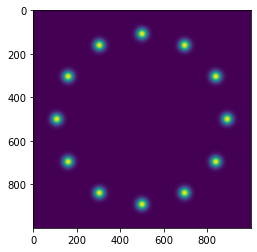

In [84]:
import numpy as np
xrange = np.linspace(-3, 3, 1000)
yrange = np.linspace(-3, 3, 1000)

X, Y = np.meshgrid(xrange, yrange)

func = sp.lambdify((x,y), model)

img = func(X, Y)

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(img)

In [13]:
%%timeit
sp.symbols(['x'])

4.16 µs ± 25.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
